# Day 37 – Customer Segmentation Using K-Means
**Objective:** Segment customers based on annual income and spending score to identify target groups for marketing and business strategies.

**Dataset:** Mall_Customers.csv  
**Features used:** Annual Income (k$), Spending Score (1–100)


In [87]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# K-Means
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Optional: Silhouette score
from sklearn.metrics import silhouette_score


## Load and Explore Dataset
Check first few rows, info, summary statistics, and initial scatter distribution.


In [88]:
# load dataset
extract_dir = '/content/extracted_data/'

df = pd.read_csv(os.path.join(extract_dir, 'Mall_Customers.csv'))
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [89]:
# Dataset info
df.info()

# Summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


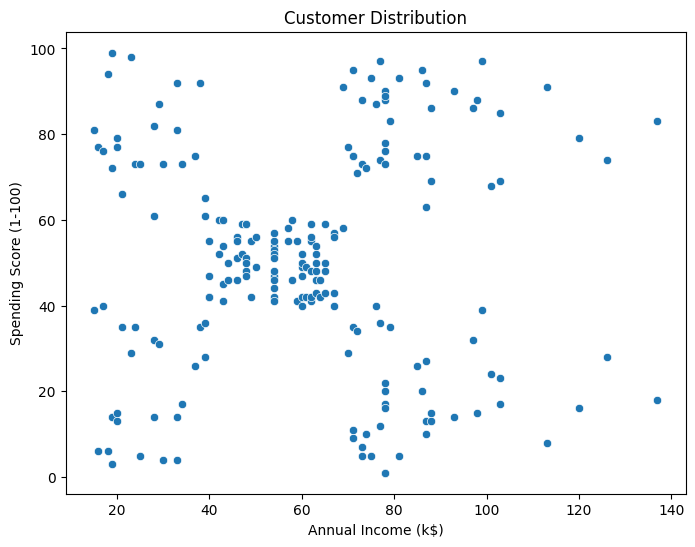

In [90]:
# Scatter plot for initial visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title("Customer Distribution")
plt.show()


## Feature Selection and Scaling
Select numeric features relevant for clustering and scale them for K-Means.


In [91]:
# Select numeric features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Determine Optimal K
Use the Elbow Method to find the best number of clusters (K).


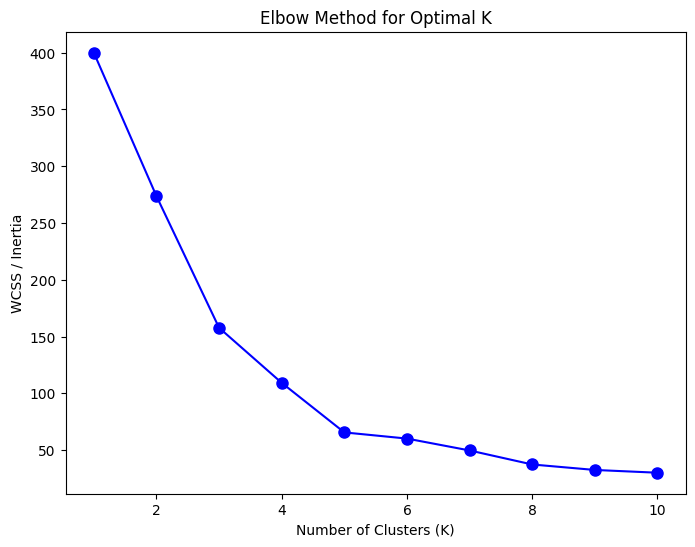

In [92]:
inertia = []
K_range = range(1,11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

# Plot Elbow
plt.figure(figsize=(8,6))
plt.plot(K_range, inertia, 'bo-', markersize=8)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS / Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()


## Fit Final K-Means Model
Use the optimal K to fit the model and assign cluster labels.


In [93]:
optimal_k = 5  # Replace with your chosen K from elbow
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
labels_final = kmeans_final.fit_predict(X_scaled)

# Add cluster labels to dataframe
df['Cluster'] = labels_final


## Cluster Visualization
Plot clusters with centroids to visually inspect segmentation.


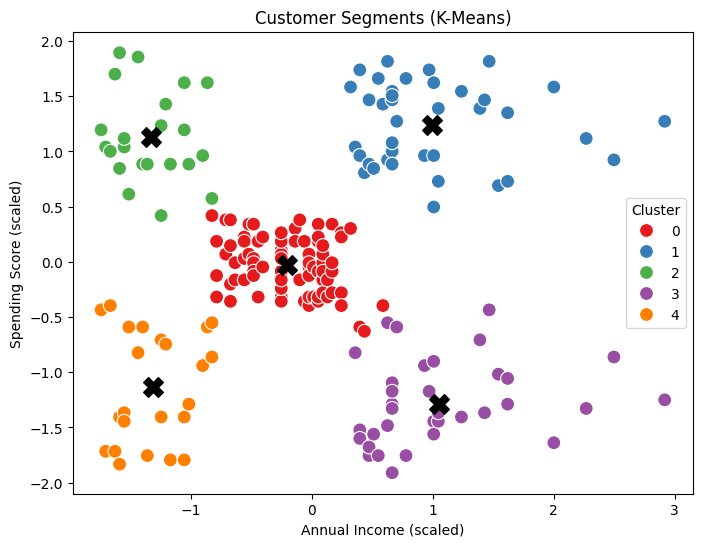

In [94]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=df['Cluster'], palette='Set1', s=100)
plt.scatter(kmeans_final.cluster_centers_[:,0], kmeans_final.cluster_centers_[:,1], color='black', marker='X', s=200)
plt.title("Customer Segments (K-Means)")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.show()


## Analyze Cluster Characteristics
Compute mean, count, and insights for each cluster.


In [95]:
cluster_summary = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].agg(['mean','count'])
cluster_summary


Annual Income (k$)       Spending Score (1-100)      
                      mean count                   mean count
Cluster                                                      
0                55.296296    81              49.518519    81
1                86.538462    39              82.128205    39
2                25.727273    22              79.363636    22
3                88.200000    35              17.114286    35
4                26.304348    23              20.913043    23

**Example Insights:**
- Cluster 0: High income, high spending → Premium customers
- Cluster 1: Low income, low spending → Budget-conscious
- Cluster 2: Medium income, high spending → Target for promotions
- Cluster 3: High income, low spending → Occasional buyers
- Cluster 4: Low income, high spending → Frequent value-seekers


## Model Evaluation
- **WCSS / Inertia:** `kmeans_final.inertia_`
- **Silhouette Score:** Measures cluster cohesion (closer to 1 = better)


In [96]:
score = silhouette_score(X_scaled, labels_final)
print("Silhouette Score:", score)


Silhouette Score: 0.5546571631111091


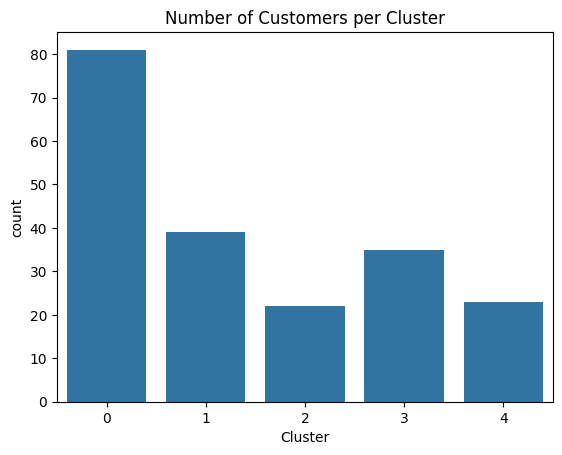

In [97]:
sns.countplot(x='Cluster', data=df)
plt.title("Number of Customers per Cluster")
plt.show()
